In [17]:
import numpy as np
time_data = np.load('experiment_results_time.npy')
propagation_data = np.load('experiment_results_propagations.npy')
%pylab inline
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *
rcParams['legend.loc'] = 'best'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [21]:
print time_data
print propagation_data
mean(time_data)

[ 2.96936607  1.05085516  0.33484387 ...,  0.02203608  0.33296084
  0.33296084]
[1134  409  133 ...,    9  129  129]


0.30774821500064192

ValueError: x and y must have same first dimension

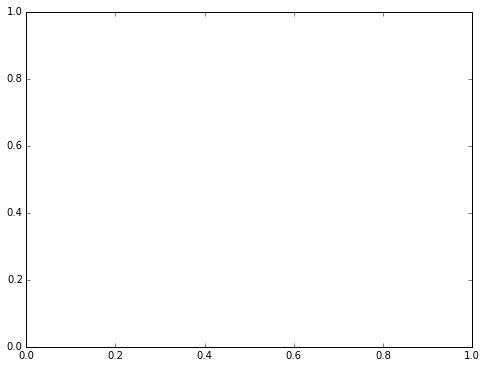

In [20]:
X = np.arange(0, 9)

visits_mean = [Data[Data[:,Columns.index('difficult_level')] == x][:, Columns.index('visits_number')].mean() for x in X]
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(X, visits_mean, 'r', label='Mean')

visits_variance = [np.var(Data[Data[:,Columns.index('difficult_level')] == x][:,Columns.index('visits_number')]) for x in X]
ax.plot(X, visits_variance, 'b', label='Variance')
ax.set_yscale('log')
legend()
xlabel('Difficulty level')
grid(True)

with PdfPages('mean_variance.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()

In [15]:
from scipy import stats

for i in range(7):
    d1 = Data[Data[:,Columns.index('difficult_level')] == i][:, Columns.index('visits_number')]
    d2 = Data[Data[:,Columns.index('difficult_level')] == i + 1][:, Columns.index('visits_number')]
    t, p = stats.ttest_ind(d1, d2, equal_var=False)
    print(p)

0.0
8.55770473357e-284
2.65903644196e-07
1.45154953605e-10
8.37588464922e-30
9.18625794388e-26
1.58232248301e-18


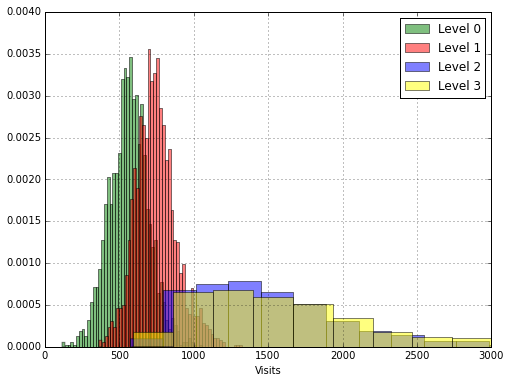

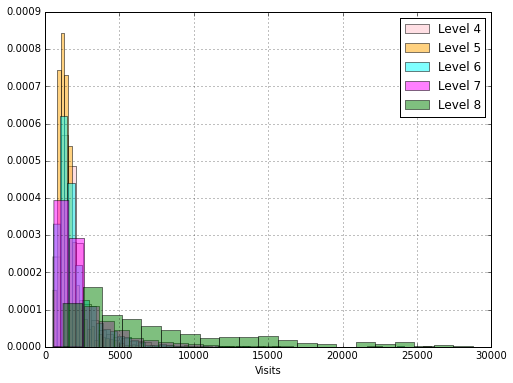

In [16]:
# Visits
num_bins = 50

colors = ['green', 'red', 'blue', 'yellow', 'pink', 'orange', 'cyan', 'magenta']
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(0, 4):
    x = Data[Data[:,0] == i][:,7]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

xlim([0, 3000])
xlabel('Visits')
legend()

grid(True)

with PdfPages('visits_0_3.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()

fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(4, 9):
    x = Data[Data[:,0] == i][:,7]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

legend()
xlim([0,30000])
xlabel('Visits')
grid(True)
with PdfPages('visits_5_8.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()

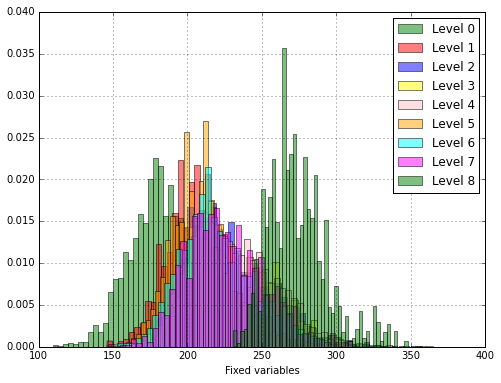

In [17]:
# Fixed variables
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(0, 9):
    x = Data[Data[:,0] == i][:,3]
    n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

legend()
xlabel('Fixed variables')
grid(True)

with PdfPages('fixed_variables.pdf') as pdf:
    pdf.savefig(fig)
    show()

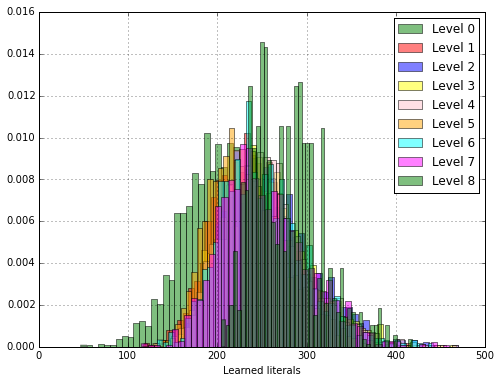

In [18]:
# Learned literals
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(9):
    x = Data[Data[:,0] == i][:,4]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

legend()
xlabel('Learned literals')
grid(True)

with PdfPages('learned_literals.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()

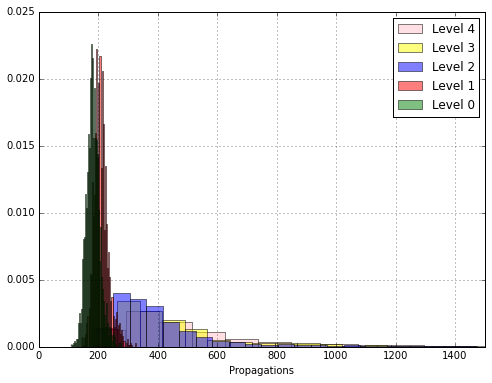

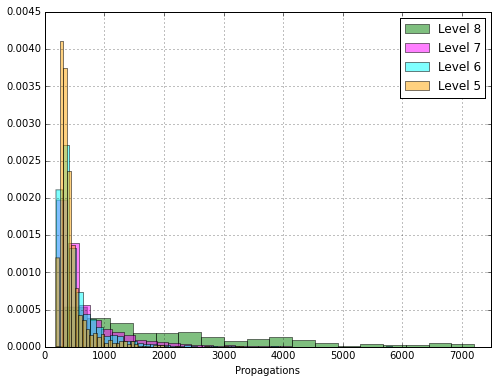

In [19]:
# Propogations
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(4, -1, -1):
    x = Data[Data[:,0] == i][:,6]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

legend()
xlim([0,1500])
xlabel('Propagations')
grid(True)
with PdfPages('propagations_0_4.pdf') as pdf:
    pdf.savefig(fig)
    show()

fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(8, 4, -1):
    x = Data[Data[:,0] == i][:,6]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))


legend()
xlim([0,7500])
xlabel('Propagations')
grid(True)

with PdfPages('propagations_5_8.pdf') as pdf:
    pdf.savefig(fig)
    show()